In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import shapefile as shp
import seaborn as sns
import geopandas as gpd

In [2]:
#Import data
#write the references where I obtained this data
data = pd.read_csv("rced_en.csv")
well_ontario = pd.read_csv("Petroleum_Well_ontario.csv")
file = ("/home/ale/notebook/Vitalis/lpr_000b16a_e/provinces/")
province = gpd.read_file(file)
province = province.to_crs("EPSG:4326")
data_geo = pd.read_csv("geothermal_heating_facilities.csv")

prov = data["Province/Territory"].unique()

QC = data[data["Province/Territory"] == 'QC'].reset_index(drop=True) #0(0,0) *
BC = data[data["Province/Territory"] == 'BC'].reset_index(drop=True) #1(0,1)
YT = data[data["Province/Territory"] == 'YT'].reset_index(drop=True) #2(1,0) *
AB = data[data["Province/Territory"] == 'AB'].reset_index(drop=True) #3(1,1)
NU = data[data["Province/Territory"] == 'NU'].reset_index(drop=True) #4(2,0) *
NL = data[data["Province/Territory"] == 'NL'].reset_index(drop=True) #5(2,1)
SK = data[data["Province/Territory"] == 'SK'].reset_index(drop=True) #6(3,0) *
MB = data[data["Province/Territory"] == 'MB'].reset_index(drop=True) #7(3,1)
NT = data[data["Province/Territory"] == 'NT'].reset_index(drop=True) #8(4,0) *
ON = data[data["Province/Territory"] == 'ON'].reset_index(drop=True) #9(4,1)

In [3]:
#There are 169 Indigenous remmote communities and 107 non-indigenous remmote communities 
data["Community classification"].value_counts()

Indigenous        169
Non-indigenous     94
Non-Indigenous     13
Name: Community classification, dtype: int64

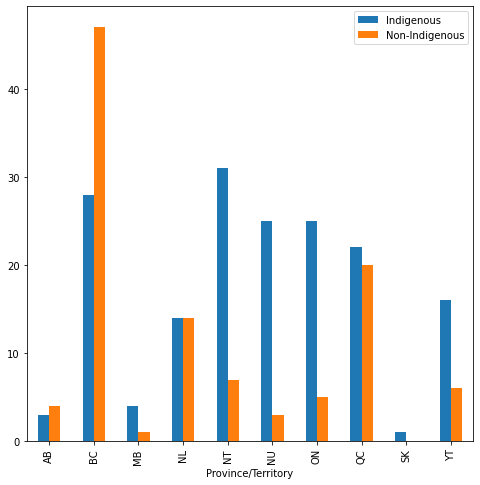

In [22]:
#
data["Community classification"].replace('Non-indigenous', 'Non-Indigenous', inplace=True)
data.groupby('Province/Territory')["Community classification"].value_counts().unstack(1).plot.bar(figsize=(8,8))
plt.legend()
plt.show()

In [23]:
#British Columbia is the province with more remote communities
data["Province/Territory"].value_counts()

BC    75
QC    42
NT    38
ON    30
NU    28
NL    28
YT    22
AB     7
MB     5
SK     1
Name: Province/Territory, dtype: int64

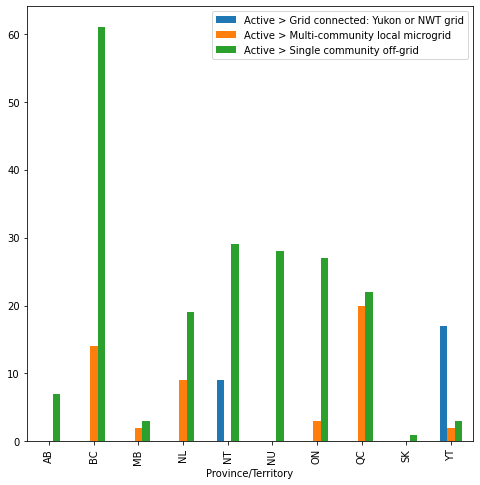

In [25]:
#data["Community record status"].describe
# WHAT IS THE YUKON OR NWT GRID
#WHAT IS THE YUKON MAIN SOURCE OF POWER
#CHECK THE GRID MAP
data.groupby("Province/Territory")["Community record status"].value_counts().unstack(1).plot.bar(figsize=(8,8))
plt.legend()
plt.show()

In [29]:
#
"""output = io.StringIO()

for i,j in zip(prov,range(len(prov))):
    if j%2==0:
        print("{}['Main power source'].value_counts().plot.pie(ax=ax[{}][0])".format(i,int(j/2)), file=output)
        print("ax[{}][0].set_title('{}')".format(int(j/2),i), file=output) 
        print("ax[{}][0].set_ylabel('')".format(int(j/2),i), file=output)     

    else:
        print("{}['Main power source'].value_counts().plot.pie(ax=ax[{}][1])".format(i,int(j/2)),file=output)
        print("ax[{}][1].set_title('{}')".format(int(j/2),i),file=output)
        print("ax[{}][1].set_ylabel('')".format(int(j/2),i), file=output)     

        
plot_MPS = output.getvalue()    

output.close()

#plot_MPS"""

'output = io.StringIO()\n\nfor i,j in zip(prov,range(len(prov))):\n    if j%2==0:\n        print("{}[\'Main power source\'].value_counts().plot.pie(ax=ax[{}][0])".format(i,int(j/2)), file=output)\n        print("ax[{}][0].set_title(\'{}\')".format(int(j/2),i), file=output) \n        print("ax[{}][0].set_ylabel(\'\')".format(int(j/2),i), file=output)     \n\n    else:\n        print("{}[\'Main power source\'].value_counts().plot.pie(ax=ax[{}][1])".format(i,int(j/2)),file=output)\n        print("ax[{}][1].set_title(\'{}\')".format(int(j/2),i),file=output)\n        print("ax[{}][1].set_ylabel(\'\')".format(int(j/2),i), file=output)     \n\n        \nplot_MPS = output.getvalue()    \n\noutput.close()\n\n#plot_MPS'

In [30]:
#

"""fig, ax = plt.subplots(5, 2, figsize=(15, 15))
QC['Main power source'].value_counts().plot.pie(ax=ax[0][0])
ax[0][0].set_title('QC')
ax[0][0].set_ylabel('')
BC['Main power source'].value_counts().plot.pie(ax=ax[0][1])
ax[0][1].set_title('BC')
ax[0][1].set_ylabel('')
YT['Main power source'].value_counts().plot.pie(ax=ax[1][0])
ax[1][0].set_title('YT')
ax[1][0].set_ylabel('')
AB['Main power source'].value_counts().plot.pie(ax=ax[1][1])
ax[1][1].set_title('AB')
ax[1][1].set_ylabel('')
NU['Main power source'].value_counts().plot.pie(ax=ax[2][0])
ax[2][0].set_title('NU')
ax[2][0].set_ylabel('')
NL['Main power source'].value_counts().plot.pie(ax=ax[2][1])
ax[2][1].set_title('NL')
ax[2][1].set_ylabel('')
SK['Main power source'].value_counts().plot.pie(ax=ax[3][0])
ax[3][0].set_title('SK')
ax[3][0].set_ylabel('')
MB['Main power source'].value_counts().plot.pie(ax=ax[3][1])
ax[3][1].set_title('MB')
ax[3][1].set_ylabel('')
NT['Main power source'].value_counts().plot.pie(ax=ax[4][0])
ax[4][0].set_title('NT')
ax[4][0].set_ylabel('')
ON['Main power source'].value_counts().plot.pie(ax=ax[4][1])
ax[4][1].set_title('ON')
ax[4][1].set_ylabel('')

plt.show()"""


"fig, ax = plt.subplots(5, 2, figsize=(15, 15))\nQC['Main power source'].value_counts().plot.pie(ax=ax[0][0])\nax[0][0].set_title('QC')\nax[0][0].set_ylabel('')\nBC['Main power source'].value_counts().plot.pie(ax=ax[0][1])\nax[0][1].set_title('BC')\nax[0][1].set_ylabel('')\nYT['Main power source'].value_counts().plot.pie(ax=ax[1][0])\nax[1][0].set_title('YT')\nax[1][0].set_ylabel('')\nAB['Main power source'].value_counts().plot.pie(ax=ax[1][1])\nax[1][1].set_title('AB')\nax[1][1].set_ylabel('')\nNU['Main power source'].value_counts().plot.pie(ax=ax[2][0])\nax[2][0].set_title('NU')\nax[2][0].set_ylabel('')\nNL['Main power source'].value_counts().plot.pie(ax=ax[2][1])\nax[2][1].set_title('NL')\nax[2][1].set_ylabel('')\nSK['Main power source'].value_counts().plot.pie(ax=ax[3][0])\nax[3][0].set_title('SK')\nax[3][0].set_ylabel('')\nMB['Main power source'].value_counts().plot.pie(ax=ax[3][1])\nax[3][1].set_title('MB')\nax[3][1].set_ylabel('')\nNT['Main power source'].value_counts().plot.pie

In [31]:
data.groupby("Province/Territory")['Main power source'].value_counts()

Province/Territory  Main power source
AB                  Diesel                6
                    Natural Gas           1
BC                  Diesel               55
                    Hydro                14
                    Unknown               6
MB                  Diesel                5
NL                  Diesel               22
                    Hydro                 6
NT                  Diesel               27
                    Prov./terr. grid      9
                    Natural Gas           2
NU                  Diesel               28
ON                  Diesel               30
QC                  Diesel               22
                    Hydro                15
                    Heavy fuel oil        3
                    Natural Gas           1
                    Other                 1
SK                  Diesel                1
YT                  Prov./terr. grid     17
                    Diesel                5
Name: Main power source, dtype: int64

In [ ]:
#There are 4 provinces in which there is not renewable energy generation
#Could be interisting to chech if there is any geothermal potential
data.groupby("Province/Territory")["Total renewable energy generation (kW)"].describe()

In [ ]:
data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].describe()

In [ ]:
colors = {'QC':'blue', 'BC':'orange', 'YT':'green', 'AB':'red', 'NU':'purple', 'NL':'brown', 'SK':'pink', 'MB':'gray', 'NT':'olive', 'ON':'cyan'}

In [ ]:
#Quebec has the total fossil fuel generating capacity (kW)
#How many active or abandoned wells are in Quebec according to this?
#How is the renewable energy potential in Quebec?

#pie chart off grid
data["Province/Territory"].value_counts().plot.pie()

In [ ]:
fig, ax = plt.subplots(1, 3)
colors = {'QC':'blue', 'BC':'orange', 'YT':'green', 'AB':'red', 'NU':'purple', 'NL':'brown', 'SK':'pink', 'MB':'gray', 'NT':'olive', 'ON':'cyan'}
data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].sum().sort_values().plot.pie(autopct='%1.1f%%',shadow=True,colors=[colors[v] for v in data.groupby("Province/Territory")["Total fossil fuel generating capacity (kW)"].sum().sort_values().keys()], legend=True, figsize=(15, 15),title='Total fossil fuel generating capacity (kW)', ylabel='', labeldistance=None,ax=ax[0])
data.groupby("Province/Territory")["Total renewable energy generation (kW)"].sum().sort_values().plot.pie(autopct='%1.1f%%',colors=[colors[v] for v in data.groupby("Province/Territory")["Total renewable energy generation (kW)"].sum().sort_values().keys()], figsize=(15, 15),title='Total renewable energy generation (kW)', ylabel='', labeldistance=None,ax=ax[1])
data.groupby("Province/Territory")["Population"].sum().sort_values().plot.pie(autopct='%1.1f%%', colors=[colors[v] for v in data.groupby("Province/Territory")["Population"].sum().sort_values().keys()],shadow=True,  figsize=(15, 15),title='Remote communities population per province', ylabel='', labeldistance=None,ax=ax[2])
fig.tight_layout(pad=0.01)
plt.show()

In [ ]:
#which communities the higher geothermal potential and what is their current main source of power?
#which communities are not connectec to the grid
#which communities produce renewable energy
#carbon capture?
#add the data of geothermal potential downloads

276 communities

In [ ]:
data["Community name"].describe()

200 communities rely on diesel for heat and power

In [ ]:
#201 communities rely on diesel for heat and power
data['Main power source'].describe()

In [ ]:
data['Main power source'].describe()

In [ ]:
communities_dat = gpd.GeoDataFrame(data,crs="EPSG:4326",geometry=gpd.points_from_xy(data['Longitude (°)'],data['Latitude (°)']))
abandoned_well_ontario = gpd.GeoDataFrame(abwell_ON,crs="EPSG:4326",geometry=gpd.points_from_xy(abwell_ON['X'],abwell_ON['Y']))

ax = province.plot(color='white',edgecolor="0.2", figsize=(15, 15))
province.apply(lambda x: ax.annotate(x.PRENAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1)
communities_dat.plot(ax=ax,label = "Remote communities in Canada",markersize=30,color='green',edgecolor="0.1")
abandoned_well_ontario.plot(ax=ax,label = "Abandoned wells",marker="x",markersize=50,color='red')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Geothermal heating facilities

geo_heating_facilities_provinces = data_geo["Province or territory"].unique()
geo_heating_facilities_provinces

In [ ]:
data_geo

In [ ]:
pd.read_csv('carbon_capture.csv')

In [ ]:
#find the locations of depleted wells abandoned
#ask for the shape file of geothermal potential in canada

In [ ]:
well_ontario["WELL_MODE"].unique()

In [ ]:
abwell_ON = well_ontario[well_ontario["WELL_MODE"]=="Abandoned Well"]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 2))
abwell_ON.WELL_TYPE.value_counts().plot.pie(autopct='%1.1f%%',legend=True, figsize=(15, 15),title='Abandoned Wells in Ontario', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='right')
plt.show()